In [2]:
# SET UP 
import pandas as pd 
import pyodbc
import sqlalchemy
from sqlalchemy import create_engine, text
from urllib.parse import quote_plus
import seaborn as sns
import matplotlib.pyplot as plt


user = "SA"
password = quote_plus("Megalochan1@1@")
server = 'localhost,1433'
database = 'AdventureWorks2025'
driver = quote_plus("ODBC Driver 18 for SQL Server")


connection_string = (
    f"mssql+pyodbc://{user}:{password}@{server}/{database}"
    f"?driver={driver}&Encrypt=yes&TrustServerCertificate=yes"
)

engine = create_engine(connection_string)


try:
    with engine.connect():
        print("Anslutning till SQL Server lyckades")
except Exception as e:
    print("Kunde inte ansluta", e)

Anslutning till SQL Server lyckades


C:\Users\chn03\AppData\Local\Temp\ipykernel_34744\3841739435.py:27: SAWarning: Unrecognized server version info '17.0.1000.7'.  Some SQL Server features may not function properly.
  with engine.connect():


In [3]:
def query_df(sql: str):
    with engine.connect() as conn:
        return pd.read_sql_query(text(sql), conn)
    

#
    

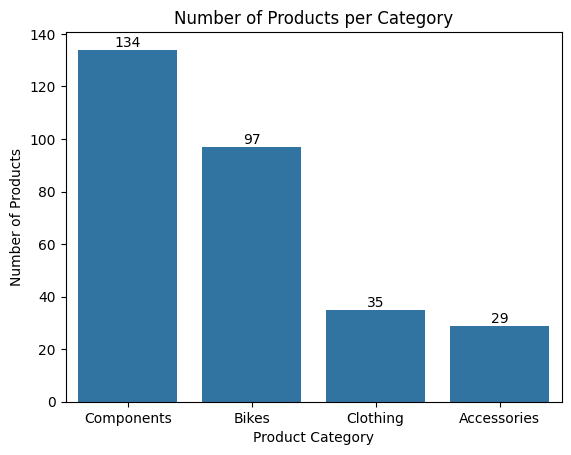

In [5]:
viz1= """
Select 
    PC.Name as CategoryName, 
    COUNT(DISTINCT P.ProductID) as ProductCount
From Production.ProductCategory as PC
Inner Join Production.ProductSubcategory as PS ON PC.ProductCategoryID = PS.ProductCategoryID  
Inner Join Production.Product as P ON PS.ProductSubcategoryID = P.ProductSubcategoryID
GROUP BY PC.Name
ORDER BY ProductCount DESC; 
"""


df_viz1 = query_df(viz1)
ax=sns.barplot(data=df_viz1, x='CategoryName', y='ProductCount')
ax.set_title('Number of Products per Category')
ax.set_xlabel('Product Category')
ax.set_ylabel('Number of Products')
ax.bar_label(ax.containers[0])
plt.show()